In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from fbprophet import Prophet

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
path = r"D:\BaiduNetdiskDownload\all.aggregate.txt"

### 1. 过滤device_id为空， 或omg_id为空或omg_id等于huzhong的记录

In [3]:
with open(path,encoding='utf-8') as f:
    content = []
    for i in range(10000000):
        row = f.readline()
        if len(row)>100:
            t = row.split(']')[0][1:]
            try:
                device_id = row.split('device_id:')[1].split('\t')[0]
            except:
                print(row)
            omg_id = row.split('omg_id:')[1].split('\t')[0]
            if device_id and omg_id:
                l = [t, device_id, omg_id]

                content.append(l)

In [4]:
data = pd.DataFrame(content, columns=['t', 'device_id', 'omg_id'])

In [5]:
data.head()

,t,device_id,omg_id
0,2020-11-10 15:18:53.853417,b8fa22357808f6d6,81c43ef3e3b4f34430fb189f36ef078f00800010215a0a
1,2020-11-10 15:18:53.884903,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
2,2020-11-10 15:18:53.899732,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
3,2020-11-10 15:18:53.989020,58d0110d311bc979,cd47817d1ce8ad44f3ca88863f40e9c1ecbc0010215415
4,2020-11-10 15:18:54.062218,5130008b631c3cfa,9b599a186810984f8f6b8635b49e04ab1386001021471a


In [6]:
data.shape

(3782621, 3)

In [7]:
data = data.query('omg_id!="huzhong"').copy()

In [8]:
data.shape

(3717302, 3)

### 2. 提取搜索总量最多的device_id和omg_id

In [9]:
data.groupby(['device_id', 'omg_id']).size().sort_values(ascending=False)

device_id         omg_id                                        
862452033733627   f86167bf904f924f5cab2d9bc6fcca6d03190010212208    648077
359250053038269   36e894726f9ed648e539faabdff5042accab0010214908    261962
86164703827183    46b346d7d8b4364a23e8bebf08467dcb3ff4001021230b    201516
b161fd96f460b181  063c8a6999c522432668c6e4f40b3c3108e5001021340f    141802
862811378554429   585cefe0e702af4180fb497d8c34d9ceffbc001021550f     66625
                                                                     ...  
866331023159454   1aa32c555a16434f01bb8bc0ff65f78041130010210801         1
866331024154785   f0637bc1b998e3424b398f01f561a037c3fc0010210911         1
866331024198204   44c41f9d37cef1497f3a684dc5c2903414ea0010212502         1
866331024862957   7d779d7b6764924b5b7bde088a96367f25be0010210913         1
00000000          16f2ed6dcf6c3b4ac02927c6b22f24693fbe0010213002         1
Length: 754289, dtype: int64

搜索总量最多的device_id: 862452033733627  
搜索总量最多的omg_id: f86167bf904f924f5cab2d9bc6fcca6d03190010212208

### 3. 画出搜索总量最多的设备对应的每小时、每分钟的搜索次数的曲线图

#### 按分钟

In [10]:
minute_data = data.query('device_id=="862452033733627"').copy()

In [11]:
minute_data.head()

,t,device_id,omg_id
1,2020-11-10 15:18:53.884903,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
2,2020-11-10 15:18:53.899732,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
17,2020-11-10 15:18:55.068480,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18,2020-11-10 15:18:55.078789,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
19,2020-11-10 15:18:55.084998,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208


In [12]:
minute_data['t'] = minute_data['t'].map(lambda x: parse(x[:17]+'00'))

In [13]:
minute_data.sort_values(by='t', inplace=True)

In [14]:
minute_data.head()

,t,device_id,omg_id
1,2020-11-10 15:18:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
1031,2020-11-10 15:18:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
1030,2020-11-10 15:18:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
1029,2020-11-10 15:18:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
1028,2020-11-10 15:18:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208


In [15]:
minute_data.groupby('t').size()

t
2020-11-10 15:18:00    190
2020-11-10 15:19:00    478
2020-11-10 15:20:00     16
2020-11-10 15:21:00     11
2020-11-10 15:22:00    137
                      ... 
2020-11-25 11:54:00    370
2020-11-25 11:55:00      5
2020-11-25 11:58:00    256
2020-11-25 11:59:00    248
2020-11-25 12:00:00      6
Length: 3055, dtype: int64

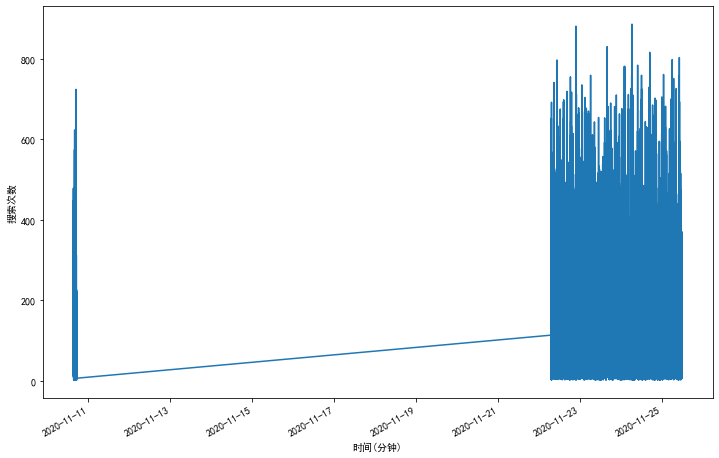

In [16]:
minute_data.groupby('t').size().plot(figsize=[12,8])
plt.xlabel('时间(分钟)')
plt.ylabel('搜索次数')
plt.show()

#### 按小时

In [17]:
hour_data = data.query('device_id=="862452033733627"').copy()

In [18]:
hour_data.head()

,t,device_id,omg_id
1,2020-11-10 15:18:53.884903,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
2,2020-11-10 15:18:53.899732,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
17,2020-11-10 15:18:55.068480,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18,2020-11-10 15:18:55.078789,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
19,2020-11-10 15:18:55.084998,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208


In [19]:
hour_data['t'] = hour_data['t'].map(lambda x: parse(x[:14]+'00:00'))

In [20]:
hour_data.sort_values(by='t', inplace=True)

In [21]:
hour_data.head()

,t,device_id,omg_id
1,2020-11-10 15:00:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18913,2020-11-10 15:00:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18912,2020-11-10 15:00:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18911,2020-11-10 15:00:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208
18908,2020-11-10 15:00:00,862452033733627,f86167bf904f924f5cab2d9bc6fcca6d03190010212208


In [22]:
hour_data.groupby('t').size()

t
2020-11-10 15:00:00     5792
2020-11-10 16:00:00     8246
2020-11-10 17:00:00     1071
2020-11-22 07:00:00     8998
2020-11-22 08:00:00    10778
                       ...  
2020-11-25 08:00:00     8390
2020-11-25 09:00:00     5181
2020-11-25 10:00:00     9454
2020-11-25 11:00:00     5467
2020-11-25 12:00:00        6
Length: 81, dtype: int64

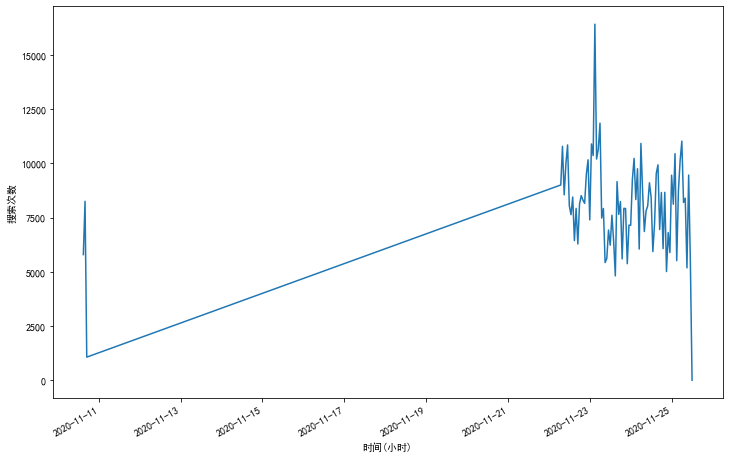

In [23]:
hour_data.groupby('t').size().plot(figsize=[12,8])
plt.xlabel('时间(小时)')
plt.ylabel('搜索次数')
plt.show()

### 4. 预测未来10小时和未来10分钟的搜索次数

#### 预测未来10分钟的搜索次数

In [24]:
minute_result = minute_data.groupby('t').size().reset_index()

In [29]:
minute_result.columns=['ds', 'y']

In [30]:
minute_result

,ds,y
0,2020-11-10 15:18:00,190
1,2020-11-10 15:19:00,478
2,2020-11-10 15:20:00,16
3,2020-11-10 15:21:00,11
4,2020-11-10 15:22:00,137
...,...,...
3050,2020-11-25 11:54:00,370
3051,2020-11-25 11:55:00,5
3052,2020-11-25 11:58:00,256
3053,2020-11-25 11:59:00,248


In [31]:
m = Prophet()

In [32]:
m.fit(minute_result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [39]:
future = m.make_future_dataframe(periods=10, freq='Min')

In [40]:
forecast = m.predict(future)

In [43]:
forecast[['ds', 'yhat']].iloc[-10:]

,ds,yhat
3055,2020-11-25 12:01:00,191.885709
3056,2020-11-25 12:02:00,191.756964
3057,2020-11-25 12:03:00,191.627683
3058,2020-11-25 12:04:00,191.497899
3059,2020-11-25 12:05:00,191.367643
3060,2020-11-25 12:06:00,191.236952
3061,2020-11-25 12:07:00,191.105858
3062,2020-11-25 12:08:00,190.974395
3063,2020-11-25 12:09:00,190.842599
3064,2020-11-25 12:10:00,190.710504


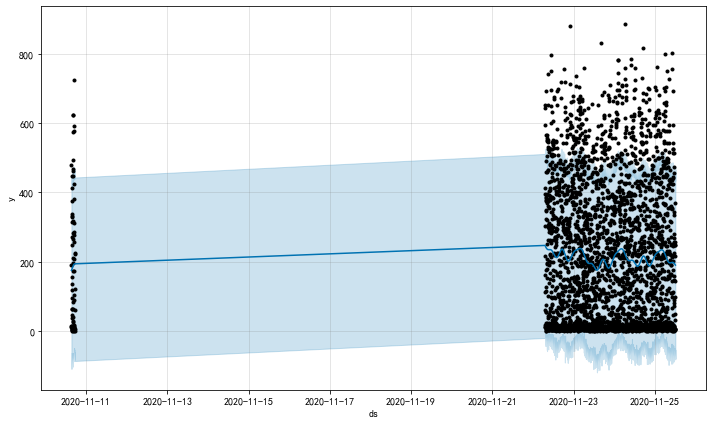

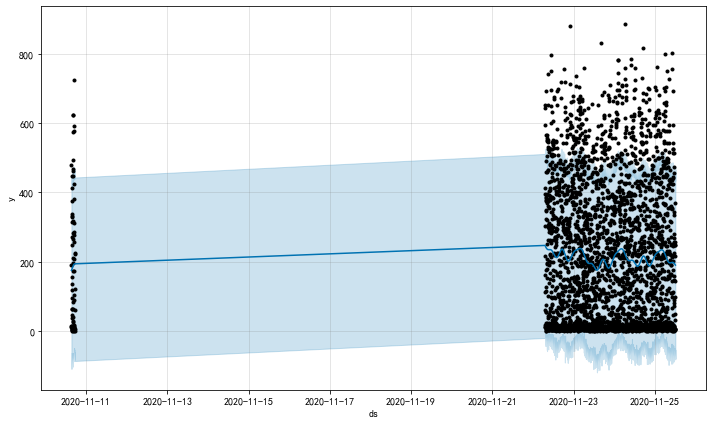

In [42]:
m.plot(forecast)

#### 预测未来10小时的搜索次数

In [49]:
hour_result = hour_data.groupby('t').size().reset_index()

In [50]:
hour_result.columns=['ds', 'y']

In [51]:
hour_result

,ds,y
0,2020-11-10 15:00:00,5792
1,2020-11-10 16:00:00,8246
2,2020-11-10 17:00:00,1071
3,2020-11-22 07:00:00,8998
4,2020-11-22 08:00:00,10778
...,...,...
76,2020-11-25 08:00:00,8390
77,2020-11-25 09:00:00,5181
78,2020-11-25 10:00:00,9454
79,2020-11-25 11:00:00,5467


In [52]:
m = Prophet()

In [53]:
m.fit(hour_result)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [54]:
future = m.make_future_dataframe(periods=10, freq='H')

In [55]:
forecast = m.predict(future)

In [56]:
forecast[['ds', 'yhat']].iloc[-10:]

,ds,yhat
81,2020-11-25 13:00:00,3617.118707
82,2020-11-25 14:00:00,3364.550066
83,2020-11-25 15:00:00,3261.802415
84,2020-11-25 16:00:00,3106.536681
85,2020-11-25 17:00:00,2753.130655
86,2020-11-25 18:00:00,2211.453058
87,2020-11-25 19:00:00,1617.232596
88,2020-11-25 20:00:00,1120.818804
89,2020-11-25 21:00:00,804.074688
90,2020-11-25 22:00:00,685.345734


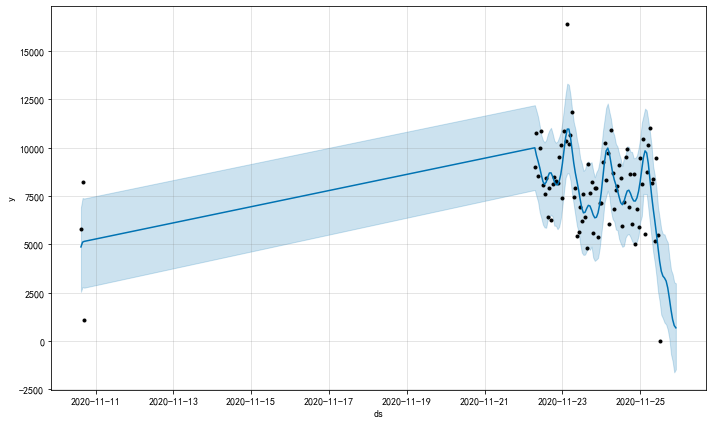

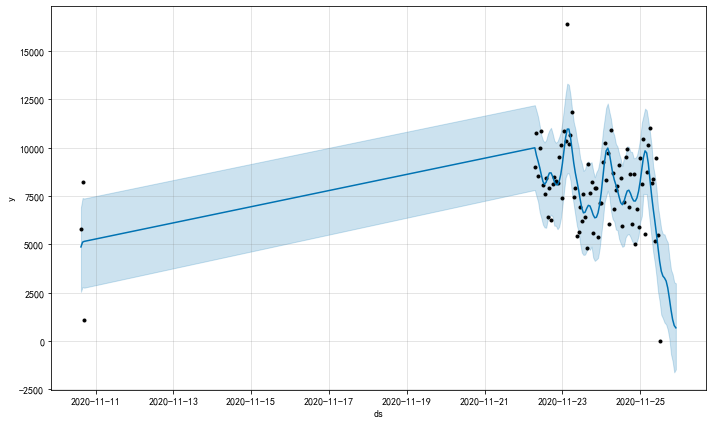

In [57]:
m.plot(forecast)